## **Country Origins & Age Rating Strategy**

This notebook analyzes two core dimensions of streaming content:  
(1) The evolving global footprint of content production, and  
(2) The age rating distribution strategy across major streaming platforms.

---

### **1. Top 5 Production Countries Over Time**
We examine the **yearly top 5 content-producing countries** by percentage share from 2016 to 2020.

**Key Takeaways:**
- **USA** dominates with >50% share across all years, though the share slightly declines post-2018.
- **UK** consistently ranks second, holding close to ~10% share.
- **India** enters the top 5 in 2018 and grows in prominence by 2020, reflecting rising content globalization.
- **France** and **Japan** have a steady but smaller presence.
- **Canada** maintains a consistent ~4% contribution each year.

The pivoted heatmap table visualizes these trends, highlighting how global content diversification is evolving while the U.S. remains the core production hub.

---

### **2. Age Rating Distribution by Platform**

We compute and visualize the **percentage of titles per age rating** (TV-G, TV-PG, TV-14, TV-MA) for each streaming service.

**Key Insights:**
- **Disney+** skews heavily toward **TV-G** and **TV-PG**, aligning with its family-oriented brand.
- **HBO Max** leads in **TV-MA** content, emphasizing prestige, adult-targeted programming.
- **Hulu+** and **Amazon Prime** show balanced distributions, with Hulu+ particularly favoring **TV-14**.
- **Netflix** displays a diverse spread across **TV-14** and **TV-MA**, appealing to both teen and mature audiences.

This breakdown illustrates how platforms tailor content tones to suit their strategic positioning and audience demographics.


In [8]:
# === Load Libraries and Mount Drive ===
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

pd.set_option("display.max_columns", None)

# === Set Working Directory and Define Paths ===
os.chdir("/content/drive/MyDrive/DSO 574 - #3 Streaming Project")

path = "Dataset"
path_rg = os.path.join(path, "ReelGood Data")
path_ampere = os.path.join(path, "Ampere Analytics Data - OPTIONAL")
# path_nielsen = os.path.join(path, "Nielsen Data - OPTIONAL")

# === Load Datasets ===
data_rg = pd.read_csv(os.path.join(path, "final_top5.csv"))
data_rg = data_rg.drop(columns=['Unnamed: 0'])

data = pd.read_csv(os.path.join(path_rg, 'Reel Good Data (Title+Service+Genre+Tag List).csv'))

# === Service Distribution Preview ===
data['Service'].value_counts(normalize=True).head(30)

# === Placeholder for Future Filtering ===
filtered_service = []

# === Country-Level Data Exploration ===
data_top_5 = pd.read_csv(os.path.join(path, "top5_country.csv"))
data_country = pd.read_csv(os.path.join(path, "production_country_data.csv"))

# Set index and group top 5 countries per year
data_top_5 = data_top_5.set_index('year')
top5_data = data_top_5.groupby('year').head(5).reset_index()

# === Pivot Year to Columns ===
top5_pivot = top5_data.pivot(index='Primary Production Country', columns='year', values='Percentage Share')

# Fill missing with label and format
top5_pivot = top5_pivot.fillna("Not in Top 5")

# === Stylize for Display ===
styled_table = (
    top5_pivot.T
    .style.format(lambda x: f"{x:.2f}%" if isinstance(x, (int, float, np.number)) else x)
    .background_gradient(cmap='Blues')
    .set_caption("Top 5 Production Countries' Percentage Share Over Years")
    .set_table_styles([
        {'selector': 'caption', 'props': [('font-size', '1.2em'), ('color', 'black')]}
    ])
)

styled_table

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/tmp/ipython-input-8-3323884721.py:25: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(os.path.join(path_rg, 'Reel Good Data (Title+Service+Genre+Tag List).csv'))


Primary Production Country,Canada,France,India,Japan,UK,USA
year,,,,,,
2016,3.99%,2.95%,Not in Top 5,3.75%,9.43%,59.82%
2017,4.14%,2.32%,Not in Top 5,3.33%,9.91%,57.36%
2018,4.22%,Not in Top 5,2.77%,3.15%,10.43%,55.19%
2019,4.21%,Not in Top 5,5.44%,3.19%,10.42%,53.42%
2020,4.15%,Not in Top 5,7.29%,3.38%,9.89%,51.28%


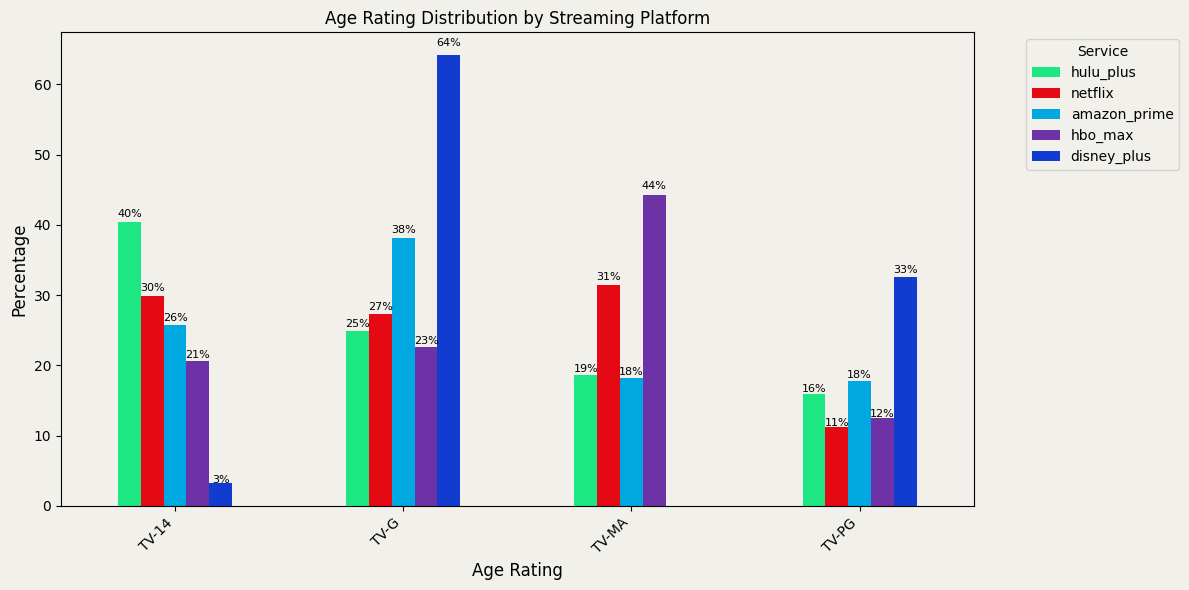

In [11]:
# === Age Rating Distribution Analysis ===

# Step 0: Define consistent platform colors
platform_palette = {
    'netflix': '#E50914',        # Red
    'amazon_prime': '#00A8E1',   # Light Blue
    'disney_plus': '#113CCF',    # Dark Blue
    'hulu_plus': '#1CE783',      # Green
    'hbo_max': '#6E32A7'         # Purple
}

# Step 1: Group by service and rating to get counts (quick look)
A = data_rg.groupby(['Service', 'Rated_filled']).size().sort_values(ascending=False)

# Step 2: Function to calculate % of each age rating per service
def age_rating_percentage_by_service(df):
    """
    Calculates the percentage of shows for each age rating within each service.
    Returns a DataFrame of percentages.
    """
    grouped = df.groupby(['Service', 'Rated_filled']).size().unstack(fill_value=0)
    percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100
    return percentages

# Step 3: Apply function
age_rating_percentages = age_rating_percentage_by_service(data_rg)

# Step 4: Sort for visualization
sorted_percentages = age_rating_percentages.sort_values(
    by=age_rating_percentages.columns.tolist(), axis=0, ascending=False
)

# Step 5: Plot bar chart
colors = [platform_palette[col] for col in sorted_percentages.T.columns]
ax = sorted_percentages.T.plot(kind='bar', figsize=(12, 6), color=colors)

# Step 6: Style chart
fig = plt.gcf()
fig.patch.set_facecolor('#f1f0ea')
ax.set_facecolor('#f1f0ea')

# Add percentage labels on bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        x, y = p.get_xy()
        ax.annotate(f'{height:.0f}%', (x + p.get_width()/2, y + height*1.02),
                    ha='center', fontsize=8)

# Final formatting
plt.title('Age Rating Distribution by Streaming Platform')
plt.xlabel('Age Rating', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.xticks(rotation=45, ha='right')
legend = ax.legend(title='Service', bbox_to_anchor=(1.05, 1), loc='upper left')
legend.get_frame().set_facecolor('#f1f0ea')
plt.tight_layout()
plt.show()
